In [46]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
from datetime import datetime

In [47]:
link = 'https://www.sofascore.com/strasbourg-paris-saint-germain/UHsjI#11392834'
response = requests.get(link,headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'})
response

<Response [200]>

In [48]:
soup = BeautifulSoup(response.text , 'html.parser')

In [49]:
soup.select('g[text-anchor="middle"]')

[]

In [50]:
headers = {"authority": "api.sofascore.com", "accept": "*/*", "accept-language": "fr-FR,fr;q=0.7", "cache-control": "max-age=0", "if-none-match": "W/\"eccfc142cf\"", "origin": "https://www.sofascore.com", "referer": "https://www.sofascore.com/", "sec-ch-ua": "\"Brave\";v=\"117\", \"Not;A=Brand\";v=\"8\", \"Chromium\";v=\"117\"", "sec-ch-ua-mobile": "?0", "sec-ch-ua-platform": "\"Windows\"", "sec-fetch-dest": "empty", "sec-fetch-mode": "cors", "sec-fetch-site": "same-site", "sec-gpc": "1", "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36"}


response = requests.get('https://api.sofascore.com/api/v1/event/11392834/average-positions', headers=headers)

In [51]:
response.status_code

200

In [52]:
avg_positions = response.json()
avg_positions

{'home': [{'player': {'name': 'Gonçalo Ramos',
    'firstName': '',
    'lastName': '',
    'slug': 'goncalo-ramos',
    'shortName': 'G. Ramos',
    'position': 'F',
    'userCount': 12793,
    'id': 934510},
   'averageX': 63.864285714286,
   'averageY': 56.62380952381,
   'pointsCount': 42},
  {'player': {'name': 'Gianluigi Donnarumma',
    'firstName': '',
    'lastName': '',
    'slug': 'gianluigi-donnarumma',
    'shortName': 'G. Donnarumma',
    'position': 'G',
    'userCount': 10186,
    'id': 824509},
   'averageX': 8.8785714285714,
   'averageY': 49.504761904762,
   'pointsCount': 42},
  {'player': {'name': 'Bradley Barcola',
    'firstName': '',
    'lastName': '',
    'slug': 'barcola-bradley',
    'shortName': 'B. Barcola',
    'position': 'F',
    'userCount': 2366,
    'id': 996952},
   'averageX': 62.272549019608,
   'averageY': 87.33137254902,
   'pointsCount': 51},
  {'player': {'name': 'Ousmane Dembélé',
    'firstName': '',
    'lastName': '',
    'slug': 'ousmane-

In [53]:
import pandas as pd

# Initialize empty lists for each column
team = []
player_name = []
is_home = []
averageX = []
averageY = []
pointsCount = []
substitution = []

data = avg_positions

# Extract substitution data
substitutions = data['substitutions']

# Create a set of players who were substituted (in)
subbed_in_players = set(sub['playerIn']['name'] for sub in substitutions if 'playerIn' in sub)

# Iterate through the data and extract the relevant information
for team_name, players in data.items():
    if team_name != 'substitutions':
        for player_data in players:
            if 'player' in player_data:
                team.append(team_name)
                player_name.append(player_data['player']['name'])
                is_home.append(team_name == 'home')
                averageX.append(player_data['averageX'])
                averageY.append(player_data['averageY'])
                pointsCount.append(player_data['pointsCount'])
                if player_data['player']['name'] in subbed_in_players:
                    substitution.append('Sub')
                else:
                    substitution.append('Starting 11')

# Create a DataFrame
df = pd.DataFrame({
    'Team': team,
    'Player Name': player_name,
    'Is Home': is_home,
    'Average X': averageX,
    'Average Y': averageY,
    'Points Count': pointsCount,
    'Substitution': substitution  # Add the Substitution column
})

# Display the DataFrame
df


,Team,Player Name,Is Home,Average X,Average Y,Points Count,Substitution
0,home,Gonçalo Ramos,True,63.864286,56.623810,42,Starting 11
1,home,Gianluigi Donnarumma,True,8.878571,49.504762,42,Starting 11
2,home,Bradley Barcola,True,62.272549,87.331373,51,Starting 11
3,home,Ousmane Dembélé,True,58.350000,16.783333,30,Sub
4,home,Vitinha,True,54.357944,69.597196,107,Starting 11
5,home,Lucas Hernández,True,45.268293,79.673171,123,Starting 11
6,home,Randal Kolo Muani,True,61.171429,26.457143,14,Sub
7,home,Nordi Mukiele,True,40.618519,51.240741,27,Sub
8,home,Marquinhos,True,34.062147,31.928814,177,Starting 11
9,home,Cher Ndour,True,46.600000,69.172727,11,Sub


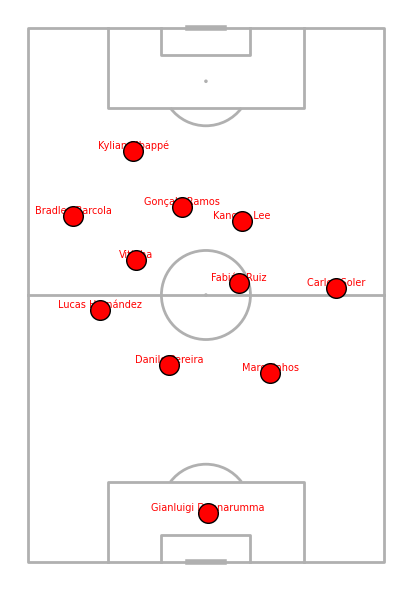

In [54]:
import matplotlib.pyplot as plt

from mplsoccer import Pitch, VerticalPitch

player_avg_pos = df[df['Is Home'] == True]
player_avg_pos = player_avg_pos[player_avg_pos['Substitution'] == 'Starting 11']
avgX, avgY = 80 - (player_avg_pos['Average Y']*4/5) , player_avg_pos['Average X'] * 5/4

# Create a pitch
pitch = VerticalPitch()

# Plot the pitch
fig, ax = pitch.draw(figsize=(12, 6))

ax.scatter(avgX, avgY, s=200, color='red', edgecolors='black', zorder=10)

for x, y, player in zip(avgX, avgY, player_avg_pos['Player Name']):
    ax.text(x, y, player, fontsize=7, color='red', va='bottom', ha='center')

plt.show()

In [55]:
#The game links (sofascore), the shotmaps api and the information for each game are stocked in an excel spreadsheet 
L1_games = pd.read_excel('C:/Users/Personnel/Ligue 1 Analysis/Shotmaps/L1_Shots_Game_links.xlsx')
L1_games

,GameWeek,Home_Team,Away_Team,Game_Link,Game_Headers,Shotmap_Api,Avg_Pos_Api
0,GW1,Nice,Lille,https://www.sofascore.com/nice-lille/THslI#113...,"{""authority"": ""api.sofascore.com"", ""accept"": ""...",https://api.sofascore.com/api/v1/event/1139110...,https://api.sofascore.com/api/v1/event/1139110...
1,GW1,Marseille,Reims,https://www.sofascore.com/stade-de-reims-olymp...,"{""authority"": ""api.sofascore.com"", ""accept"": ""...",https://api.sofascore.com/api/v1/event/1139109...,https://api.sofascore.com/api/v1/event/1139109...
2,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,"{""authority"": ""api.sofascore.com"", ""accept"": ""...",https://api.sofascore.com/api/v1/event/1139110...,https://api.sofascore.com/api/v1/event/1139110...
3,GW1,Brest,Lens,https://www.sofascore.com/stade-brestois-lens/...,"{""authority"": ""api.sofascore.com"", ""accept"": ""...",https://api.sofascore.com/api/v1/event/1139108...,https://api.sofascore.com/api/v1/event/1139108...
4,GW1,Clermont,Monaco,https://www.sofascore.com/clermont-foot-as-mon...,"{""authority"": ""api.sofascore.com"", ""accept"": ""...",https://api.sofascore.com/api/v1/event/1139108...,https://api.sofascore.com/api/v1/event/1139108...
...,...,...,...,...,...,...,...
83,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,"{""authority"": ""api.sofascore.com"", ""accept"": ""...",https://api.sofascore.com/api/v1/event/1139281...,https://api.sofascore.com/api/v1/event/1139281...
84,GW10,Lille,Monaco,https://www.sofascore.com/as-monaco-lille/THsd...,"{""authority"": ""api.sofascore.com"", ""accept"": ""...",https://api.sofascore.com/api/v1/event/1139282...,https://api.sofascore.com/api/v1/event/1139282...
85,GW10,Metz,LeHavre,https://www.sofascore.com/le-havre-metz/bIsmI#...,"{""authority"": ""api.sofascore.com"", ""accept"": ""...",https://api.sofascore.com/api/v1/event/1139281...,https://api.sofascore.com/api/v1/event/1139281...
86,GW10,Montpellier,Toulouse,https://www.sofascore.com/toulouse-montpellier...,"{""authority"": ""api.sofascore.com"", ""accept"": ""...",https://api.sofascore.com/api/v1/event/1139281...,https://api.sofascore.com/api/v1/event/1139281...


In [56]:
link = L1_games['Game_Link'][11]
link

'https://www.sofascore.com/toulouse-paris-saint-germain/YMTc#11392898'

In [66]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os

def extract_avg_pos(link, api, g_headers, Home, Away, GW):
    response = requests.get(link, headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'})
    soup = BeautifulSoup(response.text, 'html.parser')
    soup.select('g[text-anchor="middle"]')

    response = requests.get(api, headers=json.loads(g_headers), allow_redirects=True)
    avg_pos = response.json()

    #print(json.dumps(avg_pos, indent=2))
    
    # Initialize empty lists for each column
    team = []
    player_name = []
    is_home = []
    averageX = []
    averageY = []
    pointsCount = []
    substitution = []

    # Extract substitution data
    substitutions = avg_pos.get('substitutions', [])  # Ensure substitutions exist

    # Create a set of players who were substituted (in)
    subbed_in_players = set(sub['playerIn']['name'] for sub in substitutions if 'playerIn' in sub)

    # Iterate through the data and extract the relevant information
    for team_name, players in avg_pos.items():
        if team_name != 'substitutions':
            for player_data in players:
                if 'player' in player_data:
                    player_name.append(player_data['player']['name'])
                    is_home.append(team_name == 'home')
                    averageX.append(player_data.get('averageX', None))  # Corrected, use None if 'averageX' is missing
                    averageY.append(player_data.get('averageY', None))  # Corrected, use None if 'averageY' is missing
                    pointsCount.append(player_data.get('pointsCount', None))  # Corrected, use None if 'pointsCount' is missing
                    if player_data['player']['name'] in subbed_in_players:
                        substitution.append('Sub')
                    else:
                        substitution.append('Starting 11')

                    # Assign the team based on is_home
                    if team_name == 'home':
                        team.append(Home)
                    else:
                        team.append(Away)

    # Create a DataFrame
    df = pd.DataFrame({
        'GameWeek': GW,
        'Home_Team': Home,
        'Away_Team': Away,
        'Game_Link': link,
        'Average X': averageX,
        'Average Y': averageY,
        'Team': team,
        'Player Name': player_name,
        'Is Home': is_home,
        'Points Count': pointsCount,
        'Substitution': substitution
    })

    csv_file_path = 'Avg_Pos_ligue1_2710.csv'

    if not os.path.isfile(csv_file_path):
        # If the file doesn't exist, create a new DataFrame with the provided data
        df_empty = pd.DataFrame(columns=data.keys())
        df_empty.to_csv(csv_file_path, index=False)
    else:
        # If the file exists, read the existing data into a DataFrame
        df_existing = pd.read_csv(csv_file_path)

        # Check if the GameWeek already exists in the existing DataFrame
        if link not in df_existing['Game_Link'].unique():
            # Create a new DataFrame with the new data
            df_new = pd.DataFrame(df)

            # Concatenate the existing and new DataFrames
            df_combined = pd.concat([df_existing, df_new], ignore_index=True, sort=False)

            # Write the combined DataFrame back to the CSV file
            df_combined.to_csv(csv_file_path, index=False)
            df.head()
        else:
            print(f"Game {link} data already exists in the file.")

# Loop through the DataFrame rows and apply the function
for index, row in L1_games.iterrows():
    extract_avg_pos(row['Game_Link'], row['Avg_Pos_Api'], row['Game_Headers'], row['Home_Team'], row['Away_Team'], row['GameWeek'])

# Read the resulting CSV file
avg_pos_data = pd.read_csv('Avg_Pos_ligue1_2710.csv')


Game https://www.sofascore.com/nice-lille/THslI#11391102 data already exists in the file.
Game https://www.sofascore.com/stade-de-reims-olympique-de-marseille/QHsHI#11391097 data already exists in the file.
Game https://www.sofascore.com/lorient-paris-saint-germain/UHsgI#11391105 data already exists in the file.
Game https://www.sofascore.com/stade-brestois-lens/YHspJ#11391088 data already exists in the file.
Game https://www.sofascore.com/clermont-foot-as-monaco/dIsFI#11391089 data already exists in the file.
Game https://www.sofascore.com/le-havre-montpellier/RHsmI#11391092 data already exists in the file.
Game https://www.sofascore.com/toulouse-nantes/XHsGI#11391090 data already exists in the file.
Game https://sofascore.com/stade-rennais-metz/bIsiI#11391106 data already exists in the file.
Game https://www.sofascore.com/strasbourg-olympique-lyonnais/ZHsjI#11391087 data already exists in the file.
Game https://www.sofascore.com/metz-olympique-de-marseille/QHsbI#11392887 data already

In [67]:
avg_pos_data['AvgX'] = 80 - (avg_pos_data['Average Y']*4/5)
avg_pos_data['AvgY'] = avg_pos_data['Average X'] * 5/4
avg_pos_data.drop(['Average X','Average Y'],inplace = True , axis = 1)
avg_pos_data

,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
0,GW1,Nice,Lille,https://www.sofascore.com/nice-lille/THslI#113...,Nice,Sofiane Diop,True,27,Sub,16.198519,55.226852
1,GW1,Nice,Lille,https://www.sofascore.com/nice-lille/THslI#113...,Nice,Gaëtan Laborde,True,31,Starting 11,62.596129,68.322581
2,GW1,Nice,Lille,https://www.sofascore.com/nice-lille/THslI#113...,Nice,Jordan Lotomba,True,31,Sub,71.989677,40.225806
3,GW1,Nice,Lille,https://www.sofascore.com/nice-lille/THslI#113...,Nice,Youcef Atal,True,23,Starting 11,66.090435,43.798913
4,GW1,Nice,Lille,https://www.sofascore.com/nice-lille/THslI#113...,Nice,Jérémie Boga,True,35,Starting 11,14.413714,67.014286
...,...,...,...,...,...,...,...,...,...,...,...
2696,GW10,Rennes,Strasbourg,https://www.sofascore.com/strasbourg-stade-ren...,Strasbourg,Jessy Deminguet,False,19,Sub,49.452632,77.164474
2697,GW10,Rennes,Strasbourg,https://www.sofascore.com/strasbourg-stade-ren...,Strasbourg,Eduard Sobol,False,5,Sub,15.120000,48.675000
2698,GW10,Rennes,Strasbourg,https://www.sofascore.com/strasbourg-stade-ren...,Strasbourg,Thomas Delaine,False,45,Starting 11,11.079111,58.336111
2699,GW10,Rennes,Strasbourg,https://www.sofascore.com/strasbourg-stade-ren...,Strasbourg,Lucas Perrin,False,91,Starting 11,26.395604,37.131868


In [69]:
team = 'PSG'

team_data = avg_pos_data[avg_pos_data['Team'] == team]
team_data.reset_index(drop = True)

gameweeks = team_data['GameWeek'].unique()

for GameWeek in gameweeks : 
    avg_pos_game = team_data[team_data['GameWeek'] == GameWeek]
    avg_pos_game_starting11 = avg_pos_game[avg_pos_game['Substitution'] == 'Starting 11']
    display(avg_pos_game_starting11)

,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
65,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Milan Škriniar,True,166,Starting 11,36.535904,62.632530
67,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Warren Zaïre-Emery,True,129,Starting 11,49.081550,81.424419
69,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Gianluigi Donnarumma,True,13,Starting 11,42.006154,15.711538
70,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Danilo Pereira,True,177,Starting 11,57.932655,65.185028
71,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Achraf Hakimi,True,151,Starting 11,68.508079,83.163907
72,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Manuel Ugarte,True,132,Starting 11,34.980606,76.068182
73,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Gonçalo Ramos,True,54,Starting 11,44.207407,86.745370
74,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Marco Asensio,True,60,Starting 11,30.345333,82.154167
75,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Kang-in Lee,True,92,Starting 11,56.300870,90.805707
76,GW1,PSG,Lorient,https://www.sofascore.com/lorient-paris-saint-...,PSG,Lucas Hernández,True,135,Starting 11,15.971556,73.850000


,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
352,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Kang-in Lee,False,29,Starting 11,18.634483,97.745690
353,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Fabián Ruiz,False,36,Starting 11,20.622222,72.850694
354,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Gianluigi Donnarumma,False,30,Starting 11,40.930667,10.820833
355,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Lucas Hernández,False,100,Starting 11,16.448800,60.175000
358,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Milan Škriniar,False,133,Starting 11,40.020451,50.054511
359,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Marquinhos,False,141,Starting 11,58.292199,53.664894
360,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Manuel Ugarte,False,118,Starting 11,39.884746,67.278602
362,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Vitinha,False,54,Starting 11,56.271111,77.844907
363,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Warren Zaïre-Emery,False,111,Starting 11,42.229189,68.376126
365,GW2,Toulouse,PSG,https://www.sofascore.com/toulouse-paris-saint...,PSG,Achraf Hakimi,False,115,Starting 11,40.653913,72.484783


,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
648,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Marco Asensio,True,52,Starting 11,47.756923,73.218750
649,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Milan Škriniar,True,140,Starting 11,30.432000,40.986607
650,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Achraf Hakimi,True,121,Starting 11,66.103802,57.466942
651,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Lucas Hernández,True,103,Starting 11,13.630291,54.962379
654,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Kylian Mbappé,True,74,Starting 11,22.790270,86.677365
655,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Marquinhos,True,122,Starting 11,46.346885,46.129098
656,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Warren Zaïre-Emery,True,73,Starting 11,52.103014,60.957192
657,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Manuel Ugarte,True,87,Starting 11,37.591724,59.073276
658,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Vitinha,True,92,Starting 11,22.407826,71.470109
659,GW3,PSG,Lens,https://www.sofascore.com/lens-paris-saint-ger...,PSG,Ousmane Dembélé,True,67,Starting 11,64.232836,87.177239


,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
1088,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Milan Škriniar,False,134,Starting 11,26.927164,43.620336
1089,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Marco Asensio,False,45,Starting 11,48.481778,71.047222
1090,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Lucas Hernández,False,137,Starting 11,14.237664,53.701642
1091,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Marquinhos,False,128,Starting 11,51.101875,45.042969
1093,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Kylian Mbappé,False,65,Starting 11,28.263385,89.523077
1094,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Gianluigi Donnarumma,False,48,Starting 11,40.888333,9.252604
1097,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Vitinha,False,100,Starting 11,18.201600,71.227500
1098,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Ousmane Dembélé,False,79,Starting 11,63.833924,83.960443
1100,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Achraf Hakimi,False,147,Starting 11,65.775238,62.774660
1101,GW4,Lyon,PSG,https://www.sofascore.com/olympique-lyonnais-p...,PSG,Manuel Ugarte,False,68,Starting 11,36.360000,52.518382


,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
1134,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Gonçalo Ramos,True,23,Starting 11,44.692174,68.701087
1135,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Kylian Mbappé,True,56,Starting 11,23.282857,88.258929
1139,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Milan Škriniar,True,125,Starting 11,30.862080,47.030000
1140,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Achraf Hakimi,True,134,Starting 11,66.906269,65.533582
1141,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Ousmane Dembélé,True,59,Starting 11,62.050169,82.690678
1142,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Gianluigi Donnarumma,True,47,Starting 11,38.571915,9.648936
1143,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Warren Zaïre-Emery,True,90,Starting 11,40.943111,69.937500
1144,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Danilo Pereira,True,150,Starting 11,55.733333,48.970833
1145,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Vitinha,True,96,Starting 11,24.185833,70.515625
1146,GW5,PSG,Nice,https://www.sofascore.com/nice-paris-saint-ger...,PSG,Carlos Soler,True,52,Starting 11,53.756923,69.697115


,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
1597,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Bradley Barcola,True,60,Starting 11,13.590667,84.381250
1598,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Manuel Ugarte,True,91,Starting 11,43.993846,62.872253
1599,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Achraf Hakimi,True,128,Starting 11,64.019375,77.164062
1600,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Gianluigi Donnarumma,True,36,Starting 11,42.088889,14.003472
1602,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Kylian Mbappé,True,23,Starting 11,31.930435,91.978261
1603,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Warren Zaïre-Emery,True,99,Starting 11,23.308283,71.031566
1604,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Lucas Hernández,True,108,Starting 11,16.900741,61.527778
1605,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Randal Kolo Muani,True,60,Starting 11,43.145333,84.072917
1606,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Marquinhos,True,140,Starting 11,48.646286,57.050000
1607,GW6,PSG,Marseille,https://www.sofascore.com/paris-saint-germain-...,PSG,Milan Škriniar,True,157,Starting 11,34.395924,53.220541


,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
1731,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Gianluigi Donnarumma,False,38,Starting 11,38.267368,16.039474
1732,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Bradley Barcola,False,50,Starting 11,15.705600,70.172500
1735,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Fabián Ruiz,False,105,Starting 11,44.477714,64.708333
1736,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Kylian Mbappé,False,50,Starting 11,29.803200,96.180000
1737,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Achraf Hakimi,False,100,Starting 11,64.314400,72.308750
1738,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Milan Škriniar,False,99,Starting 11,31.372929,44.280303
1739,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Randal Kolo Muani,False,50,Starting 11,28.908800,84.257500
1740,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Ousmane Dembélé,False,94,Starting 11,61.758298,91.143617
1741,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Marquinhos,False,112,Starting 11,20.242143,63.793527
1742,GW7,Clermont,PSG,https://www.sofascore.com/clermont-foot-paris-...,PSG,Danilo Pereira,False,86,Starting 11,53.815814,49.187500


,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
2129,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Gonçalo Ramos,False,29,Starting 11,50.482759,66.969828
2132,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Milan Škriniar,False,104,Starting 11,27.310769,33.365385
2134,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Ousmane Dembélé,False,58,Starting 11,64.222069,80.321121
2135,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Kylian Mbappé,False,58,Starting 11,21.622069,94.122845
2136,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Marquinhos,False,102,Starting 11,56.336471,35.889706
2137,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Achraf Hakimi,False,132,Starting 11,65.956364,56.854167
2138,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Lucas Hernández,False,111,Starting 11,9.718919,49.522523
2139,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Manuel Ugarte,False,80,Starting 11,50.346000,55.653125
2140,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Gianluigi Donnarumma,False,52,Starting 11,39.203077,11.413462
2141,GW8,Rennes,PSG,https://www.sofascore.com/stade-rennais-paris-...,PSG,Vitinha,False,68,Starting 11,17.230588,68.889706


,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
2207,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Gonçalo Ramos,True,42,Starting 11,34.700952,79.830357
2208,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Gianluigi Donnarumma,True,42,Starting 11,40.396190,11.098214
2209,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Bradley Barcola,True,51,Starting 11,10.134902,77.840686
2211,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Vitinha,True,107,Starting 11,24.322243,67.947430
2212,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Lucas Hernández,True,123,Starting 11,16.261463,56.585366
2215,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Marquinhos,True,177,Starting 11,54.456949,42.577684
2218,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Danilo Pereira,True,153,Starting 11,31.814902,44.183007
2219,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Carlos Soler,True,92,Starting 11,69.286087,61.626359
2220,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Kang-in Lee,True,85,Starting 11,48.003765,76.533824
2221,GW9,PSG,Strasbourg,https://www.sofascore.com/strasbourg-paris-sai...,PSG,Kylian Mbappé,True,64,Starting 11,23.726250,92.279297


,GameWeek,Home_Team,Away_Team,Game_Link,Team,Player Name,Is Home,Points Count,Substitution,AvgX,AvgY
2564,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Gonçalo Ramos,False,42,Starting 11,50.872381,62.604167
2565,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Gianluigi Donnarumma,False,47,Starting 11,40.791489,12.715426
2569,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Danilo Pereira,False,119,Starting 11,55.894454,37.447479
2570,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Kylian Mbappé,False,44,Starting 11,20.858182,90.923295
2571,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Bradley Barcola,False,52,Starting 11,41.964615,67.471154
2572,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Achraf Hakimi,False,110,Starting 11,69.672727,55.682955
2573,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Kang-in Lee,False,70,Starting 11,40.160000,66.333929
2574,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Lucas Hernández,False,79,Starting 11,13.404557,48.612342
2575,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Fabián Ruiz,False,67,Starting 11,36.364179,52.423507
2576,GW10,Brest,PSG,https://www.sofascore.com/stade-brestois-paris...,PSG,Warren Zaïre-Emery,False,87,Starting 11,52.610575,55.193966


In [70]:
avg_pos_data['Team'] = avg_pos_data['Team'].str.strip()
teams = avg_pos_data['Team'].unique()
teams

array(['Nice', 'Lille', 'Marseille', 'Reims', 'PSG', 'Lorient', 'Brest',
       'Clermont', 'Montpellier', 'Nantes', 'Toulouse', 'Rennes', 'Metz',
       'Strasbourg', 'Lyon', 'LeHavre', 'Monaco', 'Lens'], dtype=object)

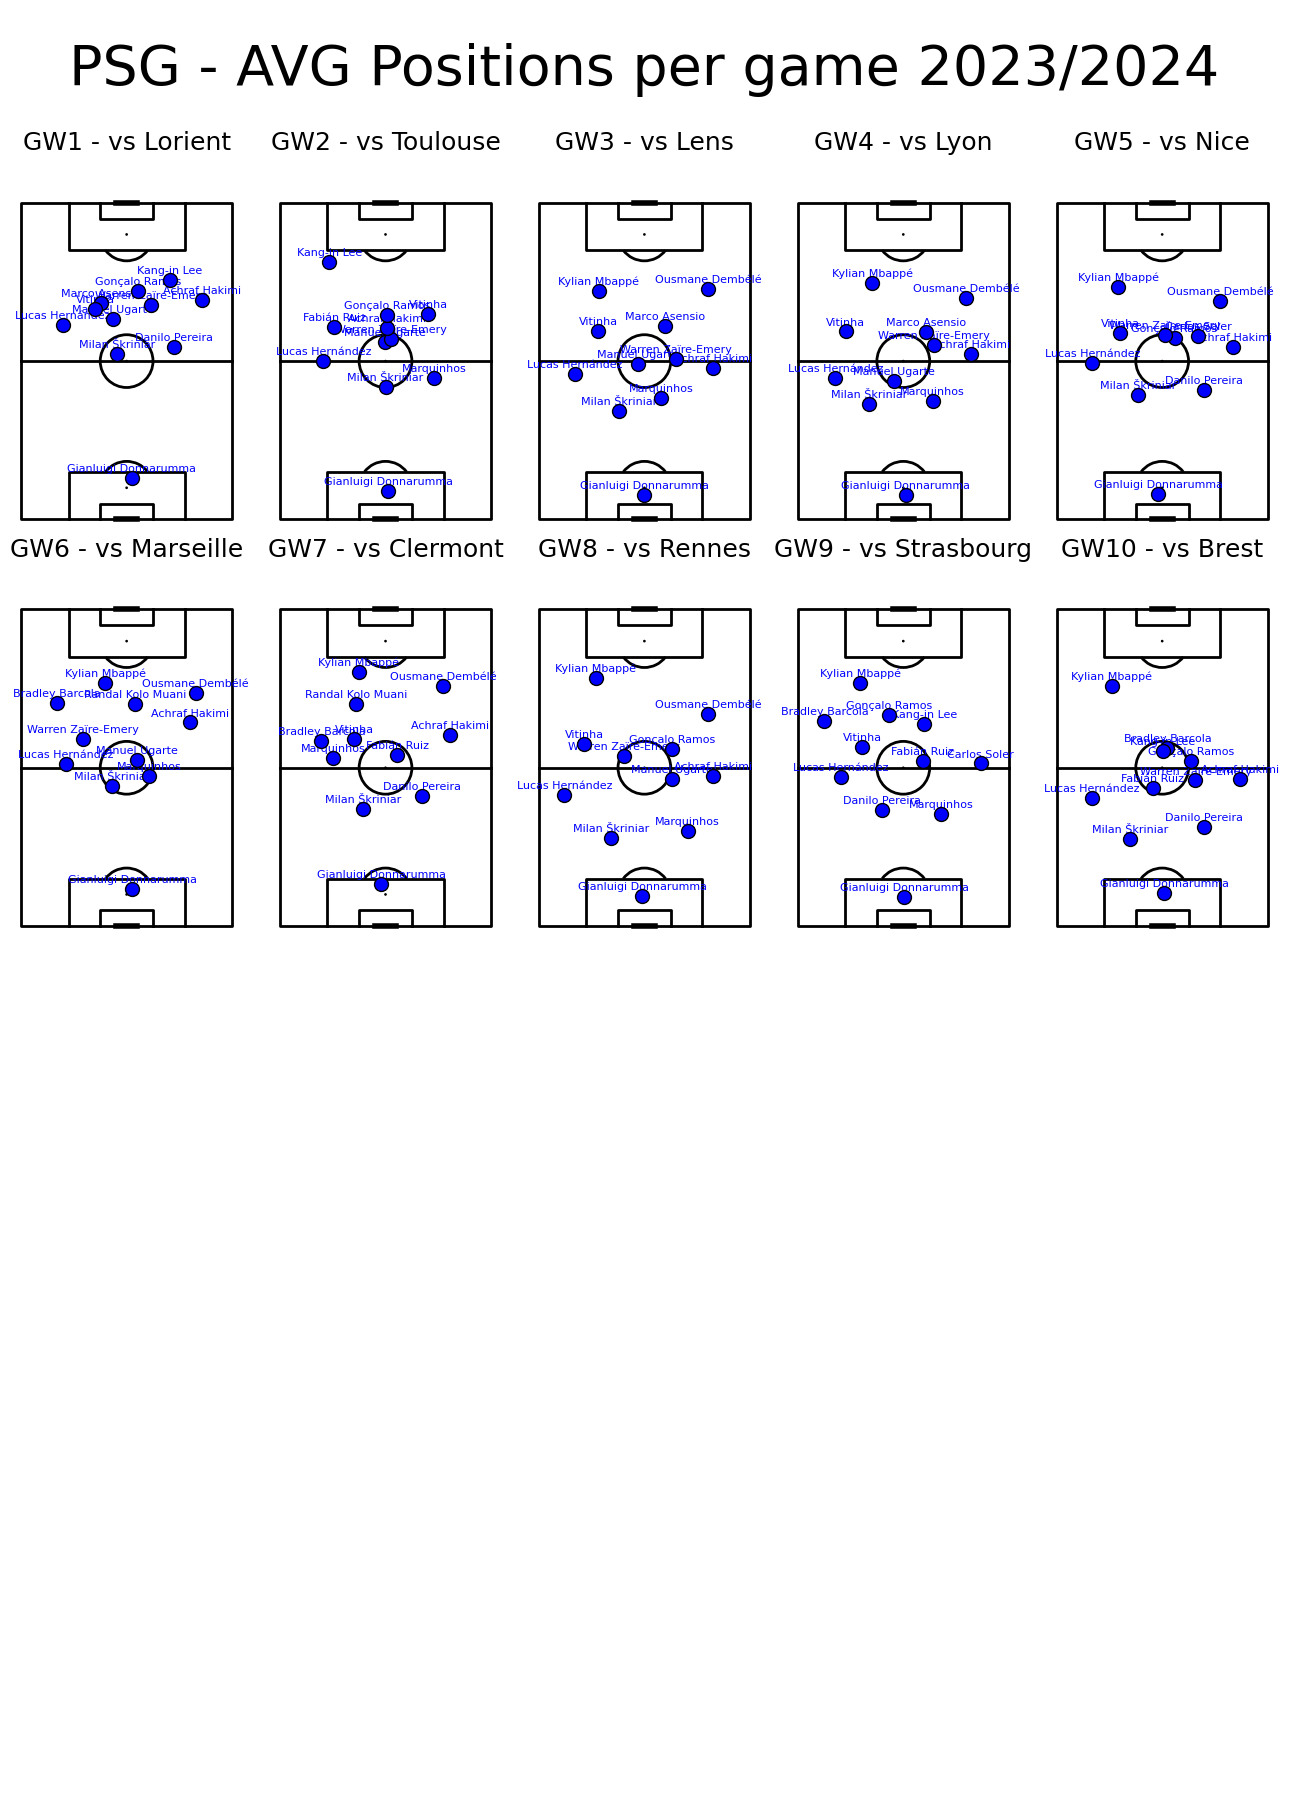

In [73]:
from mplsoccer import Pitch, FontManager
import matplotlib.pyplot as plt

fm = FontManager()
pitch = VerticalPitch(line_zorder=2, line_color='black', pad_top=20)
GRID_HEIGHT = 0.8
CBAR_WIDTH = 0.03

avg_pos_data['Team'] = avg_pos_data['Team'].str.strip()
team = 'PSG'

team_data = avg_pos_data[avg_pos_data['Team'] == team]
team_data.reset_index(drop=True)

gameweeks = team_data['GameWeek'].unique()


fig, axs = pitch.grid(nrows=4, ncols=5, figheight=20, grid_width=0.88, left=0.025, endnote_height=0.03,
                      endnote_space=0, axis=False, title_space=0.01, title_height=0.06, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

for i, GameWeek in enumerate(gameweeks):
    avg_pos_game = team_data[team_data['GameWeek'] == GameWeek]
    avg_pos_game_starting11 = avg_pos_game[avg_pos_game['Substitution'] == 'Starting 11']
    
    ax = axs['pitch'].flat[i]
    
    # Get the opposition team for the current GameWeek
    opposition_team = avg_pos_game['Home_Team'].values[0] if avg_pos_game['Away_Team'].values[0] == team else avg_pos_game['Away_Team'].values[0]

    # Title for the subplot including the opposition team
    ax.set_title(f'{GameWeek} - vs {opposition_team}', fontsize=18, pad = 0)

    # Scatter plot for the starting 11 players
    pitch.scatter(avg_pos_game_starting11['AvgY'], avg_pos_game_starting11['AvgX'], ax=ax, s=100, color='blue', edgecolors='black', zorder=10)
    for x, y, player in zip(avg_pos_game_starting11['AvgX'], avg_pos_game_starting11['AvgY']+1.5, avg_pos_game_starting11['Player Name']):
        ax.text(x, y, player, fontsize=8, color='blue', va='bottom', ha='center')
# Remove any extra subplots if there are fewer GameWeeks
for i in range(len(gameweeks), len(axs['pitch'].flat)):
    axs['pitch'].flat[i].remove()

title = axs['title'].text(0.5, 0.5, f'{team} - AVG Positions per game 2023/2024',
                          ha='center', va='center', fontsize=40)
fig.set_facecolor('white')

plt.show()
